## Решение задачи бинарной классификации

### Логистическая регрессия

In [ ]:
!wget https://raw.githubusercontent.com/rsuh-python/bak2021/main/4%20year/08/bike_buyers_clean.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
np.random.seed(42)

In [9]:
data = pd.read_csv('bike_buyers_clean.csv')

In [31]:
data.head()

,ID,Marital Status,Gender,Income,Children,Home Owner,Cars,Commute Distance,Age,Purchased Bike,Region_North America,Region_Pacific
0,12496,1,1,40000,1,1,0,0,42,0,0,0
1,24107,1,0,30000,3,1,1,0,43,0,0,0
2,14177,1,0,80000,5,0,2,2,60,0,0,0
3,24381,0,0,70000,0,1,1,3,41,1,0,1
4,25597,0,0,30000,0,0,0,0,36,1,0,0


# Обзор данных

Проверьте типы колонок в датасете

In [32]:
data.dtypes

ID                      int64
Marital Status          int64
Gender                  int64
Income                  int64
Children                int64
Home Owner              int64
Cars                    int64
Commute Distance        int64
Age                     int64
Purchased Bike          int64
Region_North America    uint8
Region_Pacific          uint8
dtype: object

Колонки с бинарными качественными признаками (типа пола) замените на чиселки

In [10]:
data['Purchased Bike'] = data['Purchased Bike'].apply(lambda x: 1 if x == 'Yes' else 0)

In [19]:
data['Home Owner'] = data['Home Owner'].apply(lambda x: 1 if x == 'Yes' else 0)

In [33]:
data.drop('ID', axis=1, inplace=True)

In [25]:
def repl(s):
  d = {'0-1 Miles': 0, '1-2 Miles': 1, '10+ Miles': 4, '2-5 Miles': 2, '5-10 Miles': 3}
  return d[s]

data['Commute Distance'] = data['Commute Distance'].apply(repl)

In [30]:
data = pd.get_dummies(data, columns=['Region'], drop_first=True)

In [ ]:
set(data['Marital Status'])

Оставим в данных только числовые колонки.

In [ ]:
# your code here

Поделите данные на матрицу объект-признак и ответ

In [34]:
y = data['Purchased Bike']
X = data.drop('Purchased Bike', axis=1)

Проверим сбалансированность классов. Если классы не сбалансированы, мы не можем использовать accuracy

In [35]:
# your code here
y.value_counts()

0    519
1    481
Name: Purchased Bike, dtype: int64

## Масштабирование числовых признаков

In [36]:
data['Income']

0       40000
1       30000
2       80000
3       70000
4       30000
        ...  
995     60000
996     70000
997     60000
998    100000
999     60000
Name: Income, Length: 1000, dtype: int64

In [ ]:
# Очень большие значения, а у нас есть Пол со значниями 0 и 1...
# Надо масштабировать!

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(data[['Income']])

Важные замечания:
- классы sklearn возвращают numpy arrays, а не pandas dataframe, что неудобно
- любое преобразование признаков в ML-задачах нужно обучать только на тренировочных данных

In [38]:
# пример работы с пайплайном
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.fit(X_train) # алгоритм находит параметры: mean и sigma. Только к обучающим данным!

X_train_sc = scaler.transform(X_train) # нормирует: x->(x-mean)/sigma
X_test_sc = scaler.transform(X_test) # с помощью mean и sigma от тренировочных данных изменяем test data

In [39]:
X_train_sc

array([[ 0.93291167, -0.97628121, -0.80990076, ...,  0.25845627,
        -1.00534763, -0.48327283],
       [-1.07191284,  1.02429504,  0.16094458, ..., -0.70549681,
         0.99468081, -0.48327283],
       [ 0.93291167, -0.97628121,  0.16094458, ...,  0.34608837,
         0.99468081, -0.48327283],
       ...,
       [-1.07191284, -0.97628121, -0.80990076, ..., -1.05602521,
         0.99468081, -0.48327283],
       [-1.07191284,  1.02429504, -1.45713098, ...,  2.09873034,
        -1.00534763, -0.48327283],
       [ 0.93291167, -0.97628121, -1.45713098, ...,  0.43372047,
        -1.00534763, -0.48327283]])

In [40]:
X_train = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

X_train.head()

,Marital Status,Gender,Income,Children,Home Owner,Cars,Commute Distance,Age,Region_North America,Region_Pacific
82,0.932912,-0.976281,-0.809901,-1.146471,0.669236,-1.276343,-1.038787,0.258456,-1.005348,-0.483273
991,-1.071913,1.024295,0.160945,-0.526086,0.669236,-1.276343,0.386813,-0.705497,0.994681,-0.483273
789,0.932912,-0.976281,0.160945,0.094299,-1.494242,0.514597,-0.325987,0.346088,0.994681,-0.483273
894,0.932912,-0.976281,0.484560,0.714683,0.669236,-1.276343,-1.038787,-0.793129,0.994681,-0.483273
398,-1.071913,-0.976281,-0.809901,-0.526086,0.669236,-0.380873,-0.325987,-0.442601,-1.005348,-0.483273


In [41]:
y_train.value_counts()

0    391
1    359
Name: Purchased Bike, dtype: int64

Обучим логистическую регрессию и посмотрим на качество модели.

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.58

# Соберем сделанные преобразования данных в pipeline

In [44]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler_', StandardScaler()),
    ('model_', LogisticRegression())
    ])

In [45]:
# пример работы с пайплайном

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.58


## Интерпретация результатов

In [46]:
model.coef_, model.intercept_

(array([[-0.32915935, -0.10822091,  0.44905943, -0.10943544,  0.1165459 ,
         -0.63497534, -0.31498378,  0.014575  ,  0.0135817 ,  0.31306727]]),
 array([-0.09003369]))

In [47]:
pipe['model_'].coef_, pipe['model_'].intercept_

(array([[-0.32915935, -0.10822091,  0.44905943, -0.10943544,  0.1165459 ,
         -0.63497534, -0.31498378,  0.014575  ,  0.0135817 ,  0.31306727]]),
 array([-0.09003369]))

In [48]:
coefs = pd.DataFrame(model.coef_, index=np.arange(len(model.coef_)), columns=X_train.columns)
coefs['Intercept'] = model.intercept_
coefs

,Marital Status,Gender,Income,Children,Home Owner,Cars,Commute Distance,Age,Region_North America,Region_Pacific,Intercept
0,-0.329159,-0.108221,0.449059,-0.109435,0.116546,-0.634975,-0.314984,0.014575,0.013582,0.313067,-0.090034


$$ y = \sigma(0.38*Income - 0.16*Children - 0.53*Cars - 0.1*Age - 0.07) $$

In [49]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipe, X, y, cv=3).mean()

0.5940191688694683

## Задача распознавания лиц

Решим задачу классификации лиц (задача многоклассовой классификации) с помощью метода опорных векторов.

In [50]:
import matplotlib.pyplot as plt

In [51]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Нарисуем несколько лиц из датасета

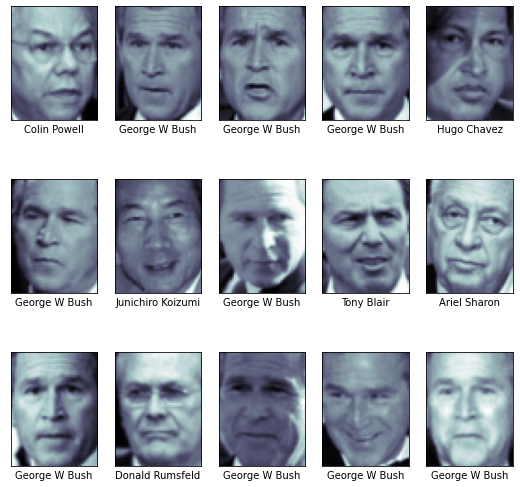

In [52]:
fig, ax = plt.subplots(3, 5, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Каждое изображение имеет размер [62×47] - это примерно 3000 пикселей. Мы можем использовать пиксели как признаки, но давайте понизим размерность пространства признаков.

Извлечем 150 самых информативных признаков из данных фотографий методом RandomizedPCA (тот самый метод главных компонент).

In [53]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA #Principal Components Analysis
from sklearn.pipeline import make_pipeline, Pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)

Попробуем решить задачу алгоритмом SVM.

In [54]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Соберем пайплайн из метода опорных векторов + метода главных компонент.

In [55]:
svc = SVC(kernel='linear', class_weight='balanced')

model_svm = make_pipeline(pca, svc)

Погридсерчим параметр С. 

Как гридсерчить: нужно собрать сетку параметров (это словарь, где ключи - названия гиперпараметров, а значения - их возможные значения, которые мы перебираем), а потом пихнуть в гридсерч модель, сетку и возможно указать какие-то параметры серча (scoring, cv...).

Если гридсерчим пайплайн, то для каждого из шагов пайпа можно указывать параметры, тогда сперва указывается название шага, а потом через двойное нижнее подчеркивание название параметра. 

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__kernel': [1, 5, 10, 50]}

grid = GridSearchCV(model_svm, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: user 12.2 s, sys: 4.3 s, total: 16.5 s
Wall time: 8.85 s
{'svc__C': 1}


In [57]:
def get_best_model(model, Xtrain, ytrain, param_grid):
    model_pipe = Pipeline([('pca', pca),('model', model)])
    
    # param_grid = {'model__C': [0.01, 0.1, 1, 5, 10]}
    
    grid = GridSearchCV(model_pipe, param_grid)
    
    grid.fit(Xtrain, ytrain)
    
    return grid.best_estimator_

In [58]:
model = get_best_model(SVC(class_weight='balanced'), Xtrain, ytrain)

yfit = model.predict(Xtest)

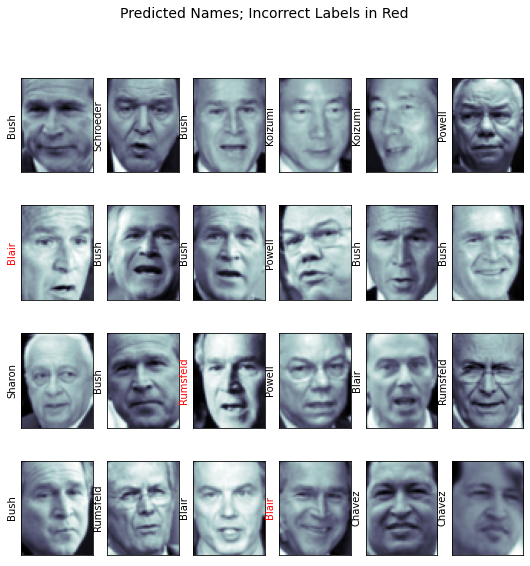

In [59]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Выведем на экран метрики классификации.

In [60]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.80      0.73        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.68      0.84      0.75        31
    George W Bush       0.97      0.78      0.86       126
Gerhard Schroeder       0.65      0.87      0.74        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.84       337
        macro avg       0.80      0.85      0.82       337
     weighted avg       0.86      0.84      0.84       337



Нарисуем матрицу ошибок классификатора.

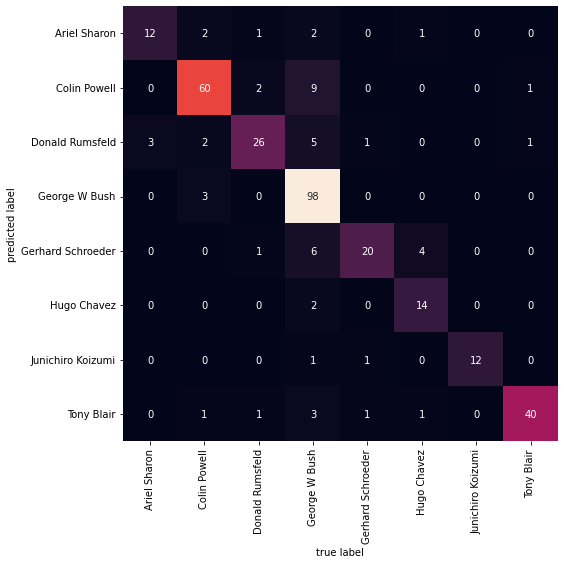

In [61]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Задание 1.

Решите задачу распознавания лиц с помощью SVM с ядром. Попробуйте различные ядра: 'poly', 'rbf', 'sigmoid'.

Подберите гиперпараметры по кросс-валидации. 

SVM с каким ядром дал лучший результат?

In [ ]:
#your code here

### Задание 2.

Решите задачу распознавания лиц с помощью логистической регрессии (она также поддерживает опцию class_weight='balanced'):

1) Объявите модель, состоящую из pipeline(pca,logistic regression)

2) Подберите по сетке параметр C логистической регрессии (с помощью GridSearch)

3) Обучите модель на тренировочных данных и выведите наилучшие параметры модели

4) KNN

5) Naive Bayes

Какое качество показала эта модель?

In [ ]:
from sklearn.linear_model import LogisticRegression

#your code here

lr = ...
model = make_pipeline(...)

param_grid = ...
grid = GridSearchCV(model, param_grid)

...